# Name: Ankit Dadarwala 
#Supervised Machine Learning Task
#Predict students scores by LinearRegression 

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [31]:
url='https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'


In [32]:
df=pd.read_csv(url)
print('Here we get dataset from github')
print(df)

Here we get dataset from github
    Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86


In [33]:
# We take few top data from dataset
print(df.head(10))

   Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30
5    1.5      20
6    9.2      88
7    5.5      60
8    8.3      81
9    2.7      25


In [34]:
df.shape
# Here we say that total 25 rows and 2 columns in our data set

(25, 2)

In [35]:
df.info()
# From that code we show all information about datasets
# like data type indivisual columns
# Memory used by dataset in system

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [36]:
df.dtypes

Hours     float64
Scores      int64
dtype: object

In [37]:
# To check any NULL values present in our datasets
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [38]:
df.count()

Hours     25
Scores    25
dtype: int64

<Figure size 720x576 with 0 Axes>

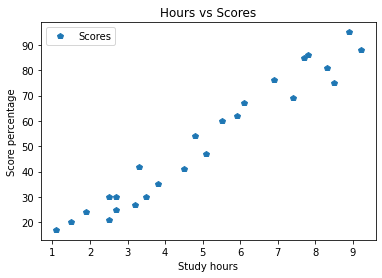

In [39]:
plt.figure(figsize=(10,8))
df.plot(x='Hours',y='Scores',style='p')
plt.title('Hours vs Scores')
plt.xlabel('Study hours')
plt.ylabel('Score percentage')
plt.show()

From the graph examination we can clearly say that hours and scores are linearly related with each other 

So if we improve study hours scores improve respectively with it

In [40]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


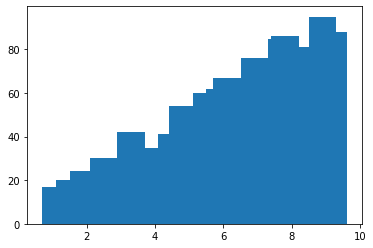

In [41]:
# Graphical presentaion of hours Vs Scores
x=df['Hours']
y=df['Scores']
plt.bar(x,y)
plt.show()

In [42]:
x=df.iloc[:, 0:-1]
x.head()

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5


In [43]:
y=df.iloc[:, -1]
y.head()

0    21
1    47
2    27
3    75
4    30
Name: Scores, dtype: int64

In [44]:
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split

Training model 

In [45]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [46]:
lm=LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [47]:
x_train.shape

(17, 1)

In [48]:
x_test.shape

(8, 1)

In [49]:
# value of coefficient
lm.coef_

array([9.78856669])

In [50]:
# y=a+bx a=intercept value
lm.intercept_

2.370815382341881

In [51]:
# model effciency of correct prediction
lm.score(x_train,y_train)

0.9484997422695115

Testing model

In [52]:
pred=lm.predict(x_test)
print('prediction value:',pred)
print('Actual values:',y_test)

prediction value: [17.05366541 33.69422878 74.80620886 26.8422321  60.12335883 39.56736879
 20.96909209 78.72163554]
Actual values: 5     20
2     27
19    69
16    30
11    62
22    35
17    24
24    86
Name: Scores, dtype: int64


In [53]:
df=pd.DataFrame({'Predict value':pred,'Actual value':y_test})
print(df)

    Predict value  Actual value
5       17.053665            20
2       33.694229            27
19      74.806209            69
16      26.842232            30
11      60.123359            62
22      39.567369            35
17      20.969092            24
24      78.721636            86


In [54]:
# Finding Error in model result
print('Mean aboslute error:',mean_absolute_error(y_test,pred))
print('mean square error:',mean_squared_error(y_test,pred))
print('root mean square error:',np.sqrt(mean_squared_error(y_test,pred)))

Mean aboslute error: 4.419727808027652
mean square error: 22.96509721270043
root mean square error: 4.792191274636315


Find given values prediction

In [55]:
test=np.array([9.25])

In [56]:
t=test.reshape(1,-1)

In [57]:
lm.predict(t)

array([92.91505723])

Hence we say that if student study 9.25 hours they will score 92.91%